In [13]:
import sys, os
sys.path.insert(0, os.path.abspath('../code'))
from estimators import *
from plotting import *
from drivers import *
import numpy as np 
#Auto reload local updates made to library 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


$\textbf{Polynomial regression without bias.~}$

We run our debiased method Debiased active regression (red) and leverage score sampling (blue) to find degree $d=15$ polynomial approximations of indicator functions under different distributions $\mu$, using $n=35$ samples and repeated for $100,000$ trials.

The dotted lines show the empirical mean of returned polynomials across all independent trials, alongside the true best-fit polynomial $p^*$ (black).Our method exactly recovers the optimal polynomial on average while leverage score sampling does not.

Shaded areas show $\pm1$ standard deviation bands.__Our method also has significantly lower variance than leverage score sampling.__

---
**Left**: When $\mu$ is the uniform distribution on \([-1,1]\), we take $$f(t) = \mathbb{1}_{t\in[-0.5,0.5]}$$

**Right**: When $\mu$ is the Gaussian distribution $\mathcal{N}(0,1)$, we take $$f(t) = \mathbb{1}_{t\in[-1,1]}$$
    

In [6]:
def f1(t, thresh=.5): #Indicator fx
    t = np.asarray(t, dtype=float)
    return (np.abs(t) <= thresh).astype(float)
    
def f2(t, thresh=1): #Indicator fx
    t = np.asarray(t, dtype=float)
    return (np.abs(t) <= thresh).astype(float)
       
num_runs = 10000
degree = 15
num_samples = 35 
step=1e-4

interval = (-1,1) 
measure = "uniform"
res1_unif = run_experiment1(f1, d=degree, n=num_samples, R=num_runs, interval=interval,step=step,measure=measure)

interval = (-5,5) 
measure = "gaussian"
res1_gauss = run_experiment1(f2, d=degree, n=num_samples, R=num_runs, interval=interval,step=step,measure=measure)

100%|██████████| 10000/10000 [01:20<00:00, 124.90it/s]


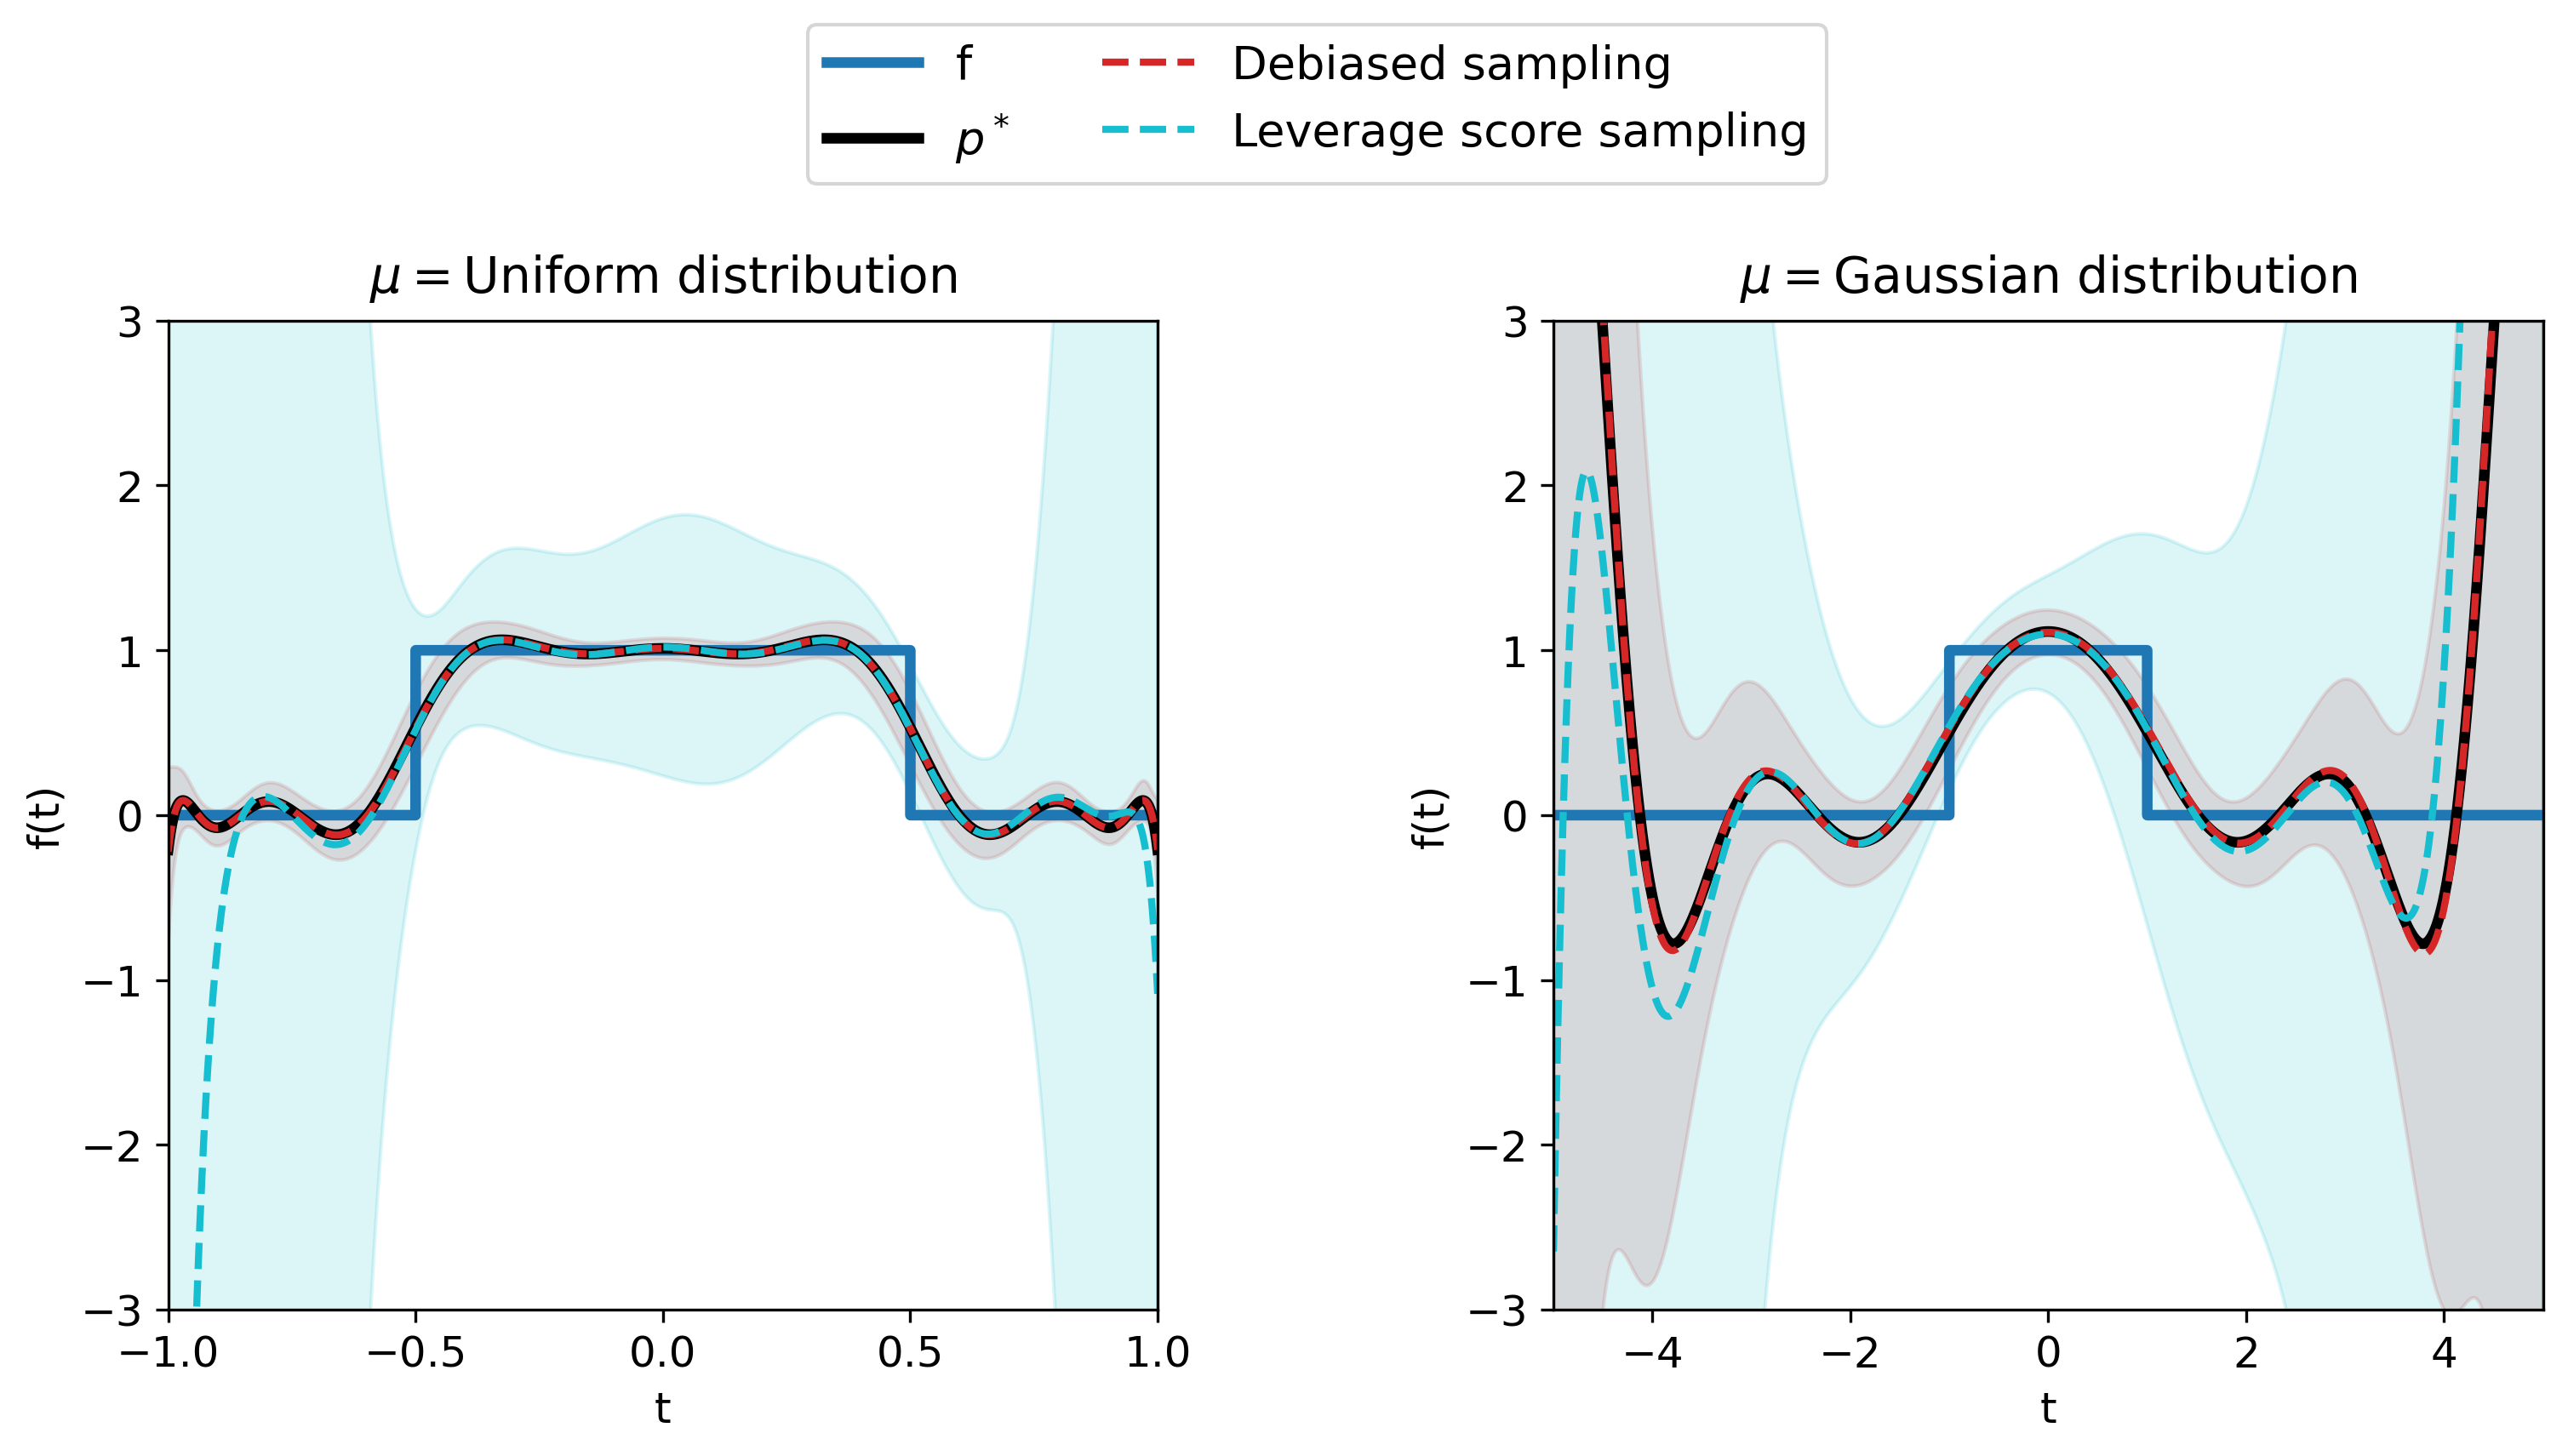

In [14]:
plot_figure1(
    res1_unif, res1_gauss,
    figsize=(12, 7),
    title_a=r"$\mu=$Uniform distribution",
    title_b=r"$\mu=$Gaussian distribution",
    save_path="res1_pair.png"
)